#Lab 09-1 ReLU

**Problem of Sigmoid**
: Vanishing Gradient

## Relu
$$ f(x)= max(0, x) $$

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)


## MNIST softmax

In [ ]:
# MNIST_softmax

#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

# Initialization
torch.nn.init.normal_(linear.weight)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # softmax is internally computed
optimizer = torch.optim.Adam(linear.parameters(), lr = learning_rate)

In [ ]:
# Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader: # X : image, Y : label
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" % (epoch + 1), "cost =" "{:.9f}".format(avg_cost))

Epoch:  0001 cost =12.044902802
Epoch:  0002 cost =12.044907570
Epoch:  0003 cost =12.044901848
Epoch:  0004 cost =12.044903755
Epoch:  0005 cost =12.044906616
Epoch:  0006 cost =12.044898987
Epoch:  0007 cost =12.044904709
Epoch:  0008 cost =12.044906616
Epoch:  0009 cost =12.044907570
Epoch:  0010 cost =12.044906616
Epoch:  0011 cost =12.044895172
Epoch:  0012 cost =12.044915199
Epoch:  0013 cost =12.044904709
Epoch:  0014 cost =12.044903755
Epoch:  0015 cost =12.044909477


## MNIST nn

In [ ]:
# parameters
learning_rate = 0.001
trainig_epochs = 15
batch_size = 100

# MNIST data image of shape 28 * 28 = 784
linear1 = torch.nn.Linear(784, 256, bias = True).to(device)
linear2 = torch.nn.Linear(256, 256, bias = True).to(device)
linear3 = torch.nn.Linear(784, 10, bias = True).to(device)
relu = torch.nn.ReLU()

# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device) # the last loss is CrossEntropyLoss

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # softmax is internally computed
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader: # X : image, Y : label
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" % (epoch + 1), "cost =" "{:.9f}".format(avg_cost))

Epoch:  0001 cost =12.044907570
Epoch:  0002 cost =12.044907570
Epoch:  0003 cost =12.044903755
Epoch:  0004 cost =12.044905663
Epoch:  0005 cost =12.044903755
Epoch:  0006 cost =12.044904709
Epoch:  0007 cost =12.044897079
Epoch:  0008 cost =12.044908524
Epoch:  0009 cost =12.044903755
Epoch:  0010 cost =12.044905663
Epoch:  0011 cost =12.044901848
Epoch:  0012 cost =12.044907570
Epoch:  0013 cost =12.044901848
Epoch:  0014 cost =12.044903755
Epoch:  0015 cost =12.044904709


#Lab 09-2 Weight Initialization

**RBM**

- Restricted Boltzmann Machine
- Restricted : no connections within a layer but full connection with next layer
- pre-trainig : add hidden layer and do RBM sequentially, similar to stack

**Xavier**
- Xavier Normal initialization
$$ W \sim N(0, Var(W))$$
$$ Var(W) = \sqrt{2 \over {n_{in} + n_{out}}}$$

- Xavier Uniform initialization
$$ W \sim U(-\sqrt{6 \over {n_{in} + n_{out}}}, +\sqrt{6 \over {n_{in} + n_{out}}}) $$

**He**
- He Normal initialization
$$ W \sim N(0, Var(W)) $$
$$ Var(W) = \sqrt{2 \over n_{in}} $$

- He Uniform initialization
$$ W \sim U(-\sqrt{6 \over n_{in}}, +\sqrt{6 \over n_{in}}) $$

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear1 = torch.nn.Linear(784, 256, bias = True).to(device)
linear2 = torch.nn.Linear(256, 256, bias = True).to(device)
linear3 = torch.nn.Linear(784, 10, bias = True).to(device)
relu = torch.nn.ReLU()

# Initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device) # the last loss is CrossEntropyLoss

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # softmax is internally computed
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader: # X : image, Y : label
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" % (epoch + 1), "cost =" "{:.9f}".format(avg_cost))

Epoch:  0001 cost =12.044906616
Epoch:  0002 cost =12.044908524
Epoch:  0003 cost =12.044910431
Epoch:  0004 cost =12.044910431
Epoch:  0005 cost =12.044898987
Epoch:  0006 cost =12.044907570
Epoch:  0007 cost =12.044911385
Epoch:  0008 cost =12.044903755
Epoch:  0009 cost =12.044911385
Epoch:  0010 cost =12.044900894
Epoch:  0011 cost =12.044899940
Epoch:  0012 cost =12.044899940
Epoch:  0013 cost =12.044902802
Epoch:  0014 cost =12.044903755
Epoch:  0015 cost =12.044901848


#Lab 09-3 Dropout

**Overfitting** : the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably

**Underfitting** : statistical model cannot adequately capture the underlying structure of the data

## Dropout : Solution for Overfitting

In [ ]:
drop_prob = 0.3

In [ ]:
# mnist nn dropout

# nn layers
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 512, bias = True)
linear3 = torch.nn.Linear(512, 512, bias = True)
linear4 = torch.nn.Linear(512, 512, bias = True)
linear5 = torch.nn.Linear(512, 10, bias = True)
relu = torch.nn.ReLU()
# dropout
dropout = torch.nn.Dropout(p = drop_prob)

# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout, 
                            linear5).to(device)


In [ ]:
 # train mode
 total_batch = len(data_loader)
 model.train() # set the model to train mode (dropout = True)


 # test model and check accuracy
 with torch.no_grad():
   model.eval() # set the model to evaluation mode (dropout = False)

#Lab 09-4 Batch Normalization

Gradient vanishing / exploding problem

**Solution**
- Change activation function
- Careful initialization
- Small learning rate ( especially for exploding )
- **Batch Normalization**

Internal Covariate Shift
- different data distribution between Train set and Test set


Batch normalization can solve internal covariate shift

normalize -> scale and shift

1. compute $\mu , \sigma$ from $x$
2. $\hat{x}$ <- normalized weight
3. $y_i$ <- scale and shift $\hat{x}$  with $\beta , \gamma$

In [7]:
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset = mnist_test, batch_size = batch_size, shuffle = False, drop_last = True)

In [10]:
# mnist batch norm
# nn layers
linear1 = torch.nn.Linear(784, 32, bias = True)
linear2 = torch.nn.Linear(32, 32, bias= True)
linear3 = torch.nn.Linear(32, 10, bias = True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias = True)
nn_linear2 = torch.nn.Linear(32, 32, bias = True)
nn_linear3 = torch.nn.Linear(32, 10, bias = True)

# model

# Use batch normalization
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu,
                               linear3).to(device)
# Not use batch normalization
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [13]:
# define cost / loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr = learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)

In [18]:
# train
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
  bn_model.train() # set the model to train mode

  for X, Y in train_loader:
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    Y = Y.to(device)

    bn_optimizer.zero_grad()
    bn_prediction = bn_model(X)
    bn_loss = criterion(bn_prediction, Y)
    bn_loss.backward()
    bn_optimizer.step()

    nn_optimizer.zero_grad()
    nn_prediction = nn_model(X)
    nn_loss = criterion(nn_prediction, Y)
    nn_loss.backward()
    nn_optimizer.step()
  
  with torch.no_grad():
    bn_model.eval() # set the model to evaluation mode

    # test the model using train sets
    bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
    for i, (X, Y) in enumerate(train_loader):
      X = X.view(-1, 28 * 28).to(device)
      Y = Y.to(device)

      bn_prediction = bn_model(X)
      bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
      bn_loss += criterion(bn_prediction, Y)
      bn_acc += bn_correct_prediction.float().mean()

      nn_prediction = nn_model(X)
      nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
      nn_loss += criterion(nn_prediction, Y)
      nn_acc += nn_correct_prediction.float().mean()

    bn_loss, nn_loss = bn_loss / train_total_batch, nn_loss / train_total_batch 
    bn_acc, nn_acc = bn_acc / train_total_batch, nn_acc / train_total_batch

    # save train losses / accs
    train_losses.append([bn_loss, nn_loss])
    train_accs.append([bn_acc, nn_acc])

    print('[Epoch %d-TRAIN] Batchnorm Loss(Acc) : bn_loss : %.5f (bn_acc: %.2f) vs No Batchnorm Loss(Acc) : nn_loss : %.5f (nn_acc : %.2f)' % (
        (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
    bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
    
    for i, (X, Y) in enumerate(test_loader):
      X = X.view(-1, 28 * 28).to(device)
      Y = Y.to(device)

      bn_prediction = bn_model(X)
      bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
      bn_loss += criterion(bn_prediction, Y)
      bn_acc += bn_correct_prediction.float().mean()

      nn_prediction = nn_model(X)
      nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
      nn_loss += criterion(nn_prediction, Y)
      nn_acc += nn_correct_prediction.float().mean()

    bn_loss, nn_loss = bn_loss / test_total_batch, nn_loss / test_total_batch 
    bn_acc, nn_acc = bn_acc / test_total_batch, nn_acc / test_total_batch

    # save train losses / accs
    valid_losses.append([bn_loss, nn_loss])
    valid_accs.append([bn_acc, nn_acc])

    print('[Epoch %d-VALID] Batchnorm Loss(Acc) : bn_loss : %.5f (bn_acc: %.2f) vs No Batchnorm Loss(Acc) : nn_loss : %.5f (nn_acc : %.2f)' % (
        (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
    print()

print('Learning finished')

[Epoch 1-TRAIN] Batchnorm Loss(Acc) : bn_loss : 0.04293 (bn_acc: 0.99) vs No Batchnorm Loss(Acc) : nn_loss : 0.09399 (nn_acc : 0.97)
[Epoch 1-VALID] Batchnorm Loss(Acc) : bn_loss : 0.09292 (bn_acc: 0.97) vs No Batchnorm Loss(Acc) : nn_loss : 0.18714 (nn_acc : 0.96)

[Epoch 2-TRAIN] Batchnorm Loss(Acc) : bn_loss : 0.04063 (bn_acc: 0.99) vs No Batchnorm Loss(Acc) : nn_loss : 0.11040 (nn_acc : 0.97)
[Epoch 2-VALID] Batchnorm Loss(Acc) : bn_loss : 0.08986 (bn_acc: 0.97) vs No Batchnorm Loss(Acc) : nn_loss : 0.22114 (nn_acc : 0.96)

[Epoch 3-TRAIN] Batchnorm Loss(Acc) : bn_loss : 0.04372 (bn_acc: 0.99) vs No Batchnorm Loss(Acc) : nn_loss : 0.08805 (nn_acc : 0.98)
[Epoch 3-VALID] Batchnorm Loss(Acc) : bn_loss : 0.09367 (bn_acc: 0.97) vs No Batchnorm Loss(Acc) : nn_loss : 0.18178 (nn_acc : 0.96)

[Epoch 4-TRAIN] Batchnorm Loss(Acc) : bn_loss : 0.03707 (bn_acc: 0.99) vs No Batchnorm Loss(Acc) : nn_loss : 0.12569 (nn_acc : 0.97)
[Epoch 4-VALID] Batchnorm Loss(Acc) : bn_loss : 0.08496 (bn_acc: 0

In [19]:
def plot_compare(loss_list: list, ylim = None, title = None) -> None:
  bn = [i[0] for i in loss_list]
  nn = [i[1] for i in loss_list]

  plt.figure(figsize = (15, 10))
  plt.plot(bn, label = 'With BN')
  plt.plot(nn, label = 'Without BN')

  if ylim:
    plt.ylim(ylim)
  
  if title:
    plt.title(title)
  
  plt.legend()
  plt.grid('on')
  plt.show()

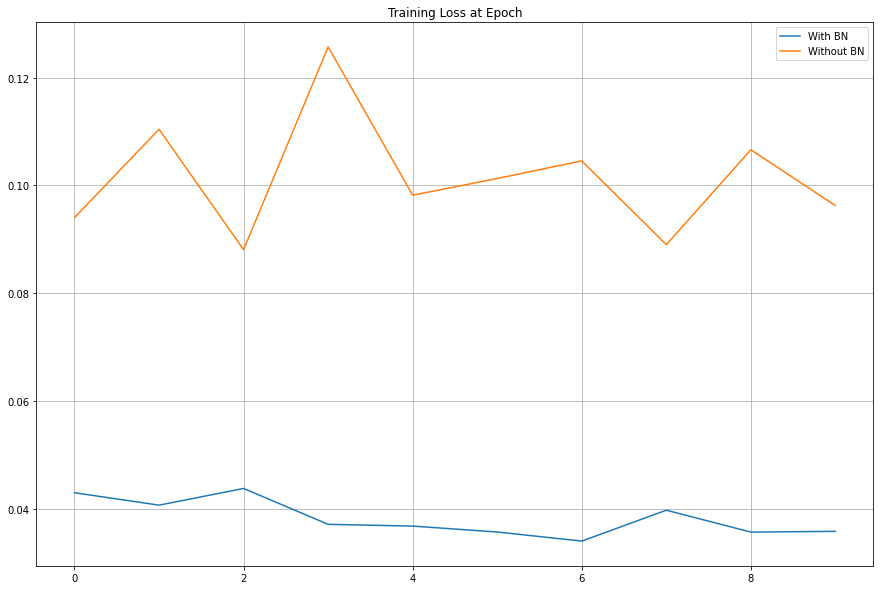

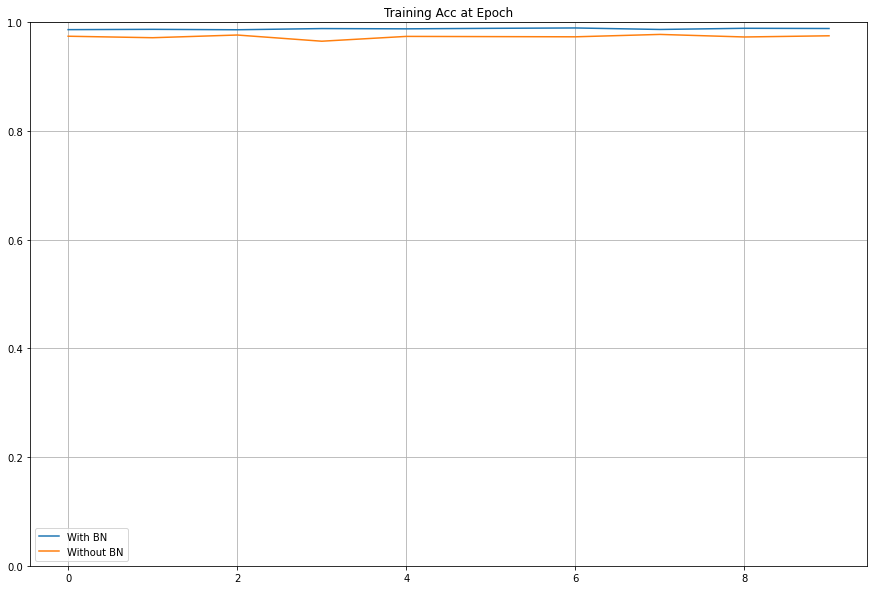

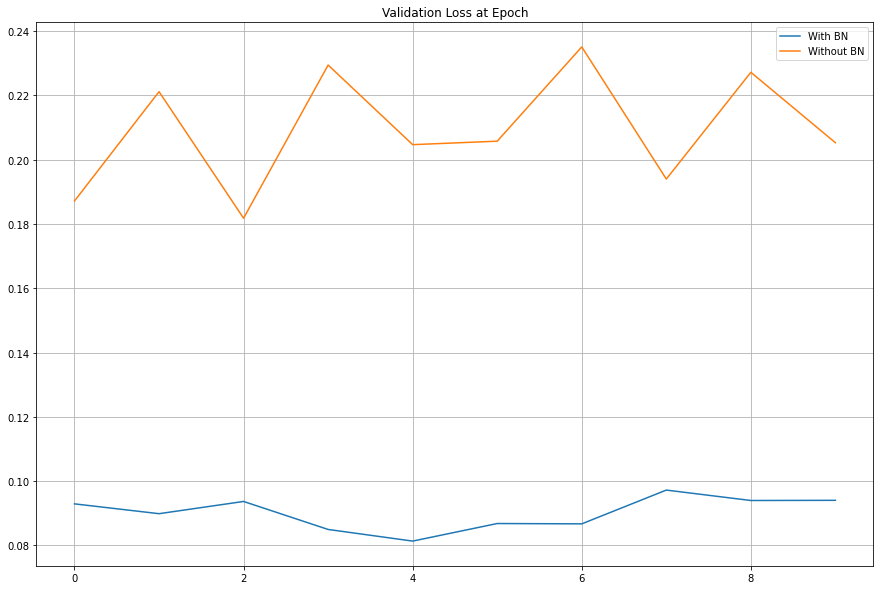

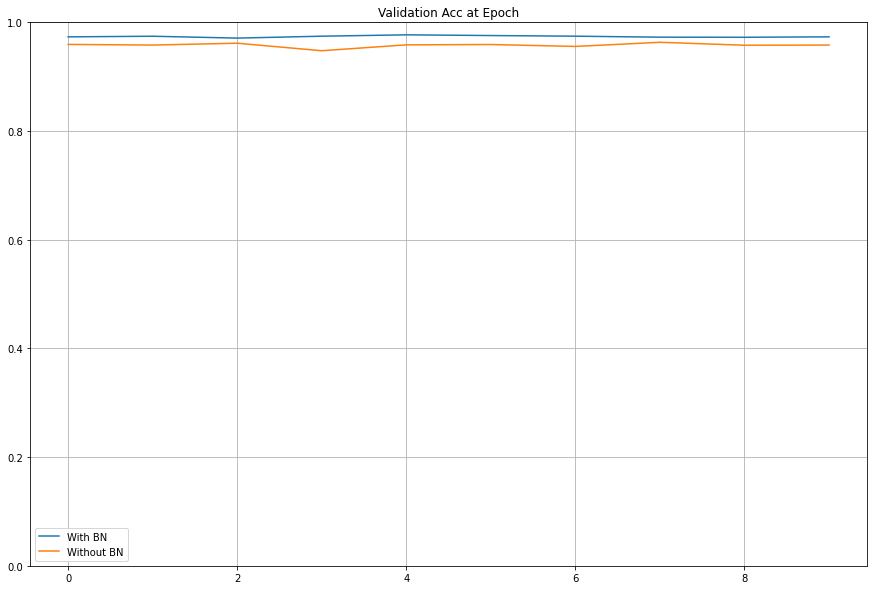

In [20]:
plot_compare(train_losses, title = 'Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title = 'Training Acc at Epoch')
plot_compare(valid_losses, title = 'Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title = 'Validation Acc at Epoch')